In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


## Part I

In [6]:
## Looad points 

with open('points.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

blue_points = loaded_data['blue_points']
one_blue = blue_points[0]
print(one_blue)
black_points = loaded_data['black_points']
one_black = black_points[0]
print(one_black)
print(blue_points.shape)
print(black_points.shape)

[ 1.  5. 10.]
[ 1.  1. 10.]
(1000000, 3)
(1000000, 3)


### Camera parameters

In [7]:
# Define camera parameters
camera_center = np.array([0, 0, 0])
focal_length = 1

# Define image planes
# Standard plane perpendicular to the Z-axis
standard_plane_z = 1

# Custom plane equation (ax + by + cz + d = 0)
# Example: a plane rotated around the Y-axis by 45 degrees
a, b, c, d = 1, 0, 1, -1  # coefficients for the plane equation

### Projection to standard plane

In [8]:
def project_points_to_standard_plane(points, camera_center, focal_length, plane_z):
    projected_points = []
    for point in points:
        '''
        direction vector = A ray starts from the camera center and travels infinitely through many points in space
        to find the ray that hits a point,  we subtract the point from the camera center to the point itself, this gives us the direction vector
        
        scale: this is used to determine how far along the direction vector we need to travel to reach the image plane. This would help us to find the intersection point of the ray with the plane
        
        It is just the same ray that we have calculated, but we are scaling it to reach the image plane. The scale is calculated by dividing the distance of the plane from the camera center by the z-component of the direction vector
        
        intersection: This is the point where the ray intersects the image plane. It is calculated by adding the scaled direction vector to the camera center
        
        The intersection point represents the 3D co-ordinates of the point on the image plane. But we need to convert this into 2D.
        
        '''
        # Calculate the direction vector from the camera center to the point = it describes the ray from the camera to the point
        direction_vector = point - camera_center
        # Calculate the intersection point with the plane
        scale = (plane_z - camera_center[2]) / direction_vector[2]
        intersection_point = camera_center + scale * direction_vector # This is the ray equation
        # Calculate the projection of the intersection point with the plane onto the image plane
        projection = focal_length * intersection_point / intersection_point[2]
        projection = projection[:2]  # Keep only the x and y coordinates
        projected_points.append(projection)
    return np.array(projected_points)

project_points_to_standard_plane(blue_points, camera_center, focal_length, standard_plane_z)

array([[1.00000000e-01, 5.00000000e-01],
       [5.00000000e-02, 2.50000000e-01],
       [3.33333333e-02, 1.66666667e-01],
       ...,
       [1.00000200e-07, 5.00001000e-07],
       [1.00000100e-07, 5.00000500e-07],
       [1.00000000e-07, 5.00000000e-07]], shape=(1000000, 2))

#### Plotting the projections

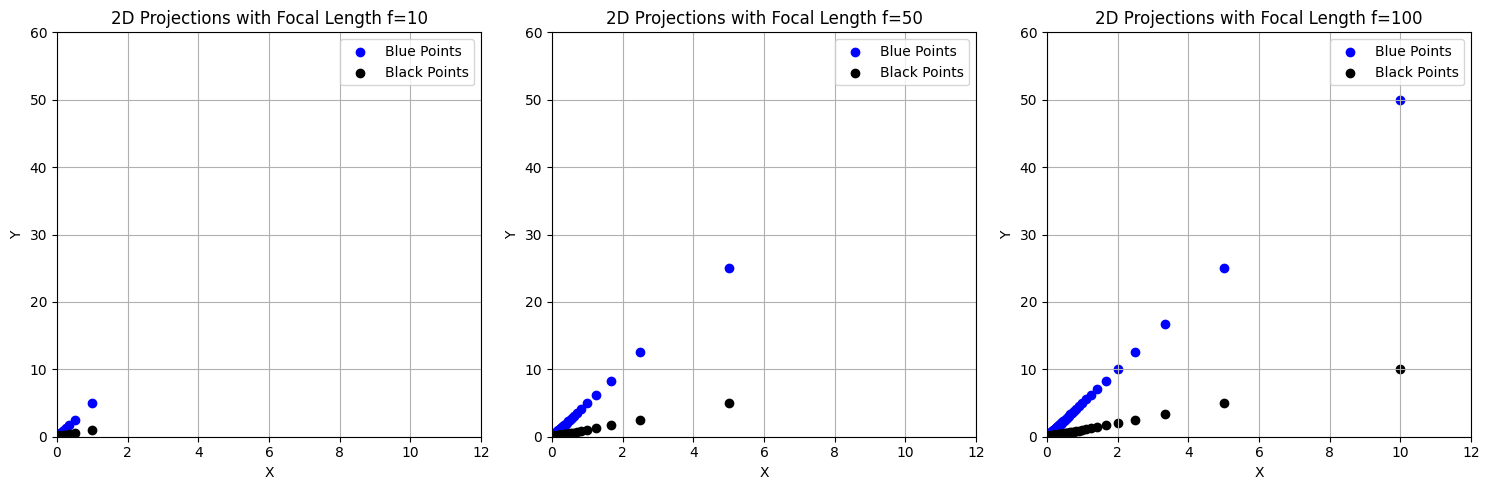

In [13]:
focal_lengths = [10, 50, 100]
Z0 = 1


# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, f in enumerate(focal_lengths):
    blue_points_proj = project_points_to_standard_plane(blue_points, camera_center, f, Z0)
    black_points_proj = project_points_to_standard_plane(black_points, camera_center, f, Z0)
    
    ax = axes[idx]  # Get the subplot axis

    # Plot blue and black points for each focal length on the current subplot
    ax.scatter(blue_points_proj[:, 0], blue_points_proj[:, 1], color='blue', label='Blue Points')
    ax.scatter(black_points_proj[:, 0], black_points_proj[:, 1], color='black', label='Black Points')

    # Set the limits, titles, and labels for each subplot
    ax.set_xlim(0.00, 12)
    ax.set_ylim(0.00, 60)
    ax.set_title(f'2D Projections with Focal Length f={f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Plotting to a titled Image Plane

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_8632\1464731667.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


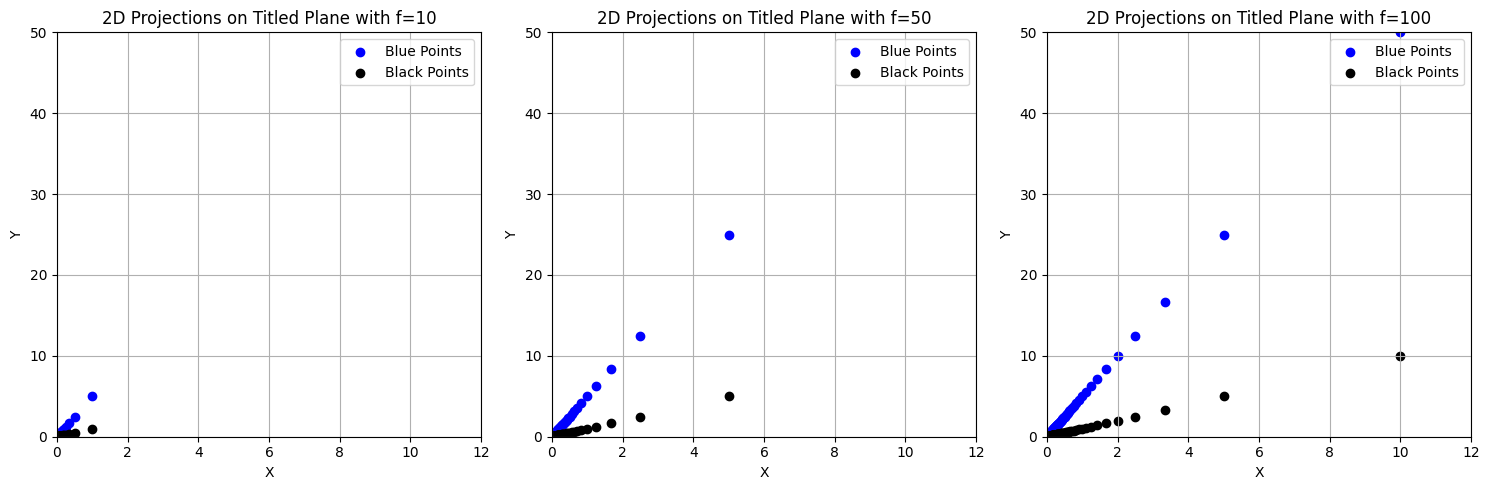

In [14]:
def project_points_to_titled_plane(points, camera_center, focal_length, a, b, c, d):
    '''
    a, b, c, d: coefficients for the plane equation ax + by + cz + d = 0
    a,b and c defines the orientation(normal vector) of the plane
    d is the distance of the plane from the origin
    
    Like the standard plane, we calculate the direction vector of the ray from the camera center to the point
        - to find the direction vector, we subtract the point from the camera center
    We calculate the scale to determine how far along the direction vector we need to travel to reach the image plane
        - the scale is calculated by dividing the distance of the plane from the camera center by the dot product of the direction vector and the normal vector of the plane
    We calculate the intersection point of the ray with the plane
        - the intersection point is calculated by adding the scaled direction vector to the camera center
    We calculate the projection of the intersection point with the plane onto the image
        - the projection is calculated by multiplying the focal length by the intersection point and dividing by the z-component of the intersection point
    
    so the only difference between the standard plane and the titled plane is the calculation of the scale
    
    
    '''
    projected_points = []
    for point in points:
        direction_vector = point - camera_center
        scale = (d - np.dot([a, b, c], camera_center)) / np.dot([a, b, c], direction_vector)
        intersection_point = camera_center + scale * direction_vector
        projection = focal_length * intersection_point / intersection_point[2]
        projection = projection[:2]
        projected_points.append(projection)
    return np.array(projected_points)

project_points_to_titled_plane(blue_points, camera_center, focal_length, a, b, c, d)
focal_lengths = [10, 50, 100]
Z0 = 1

# Create a single figure with 3 subplots arranged in 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, f in enumerate(focal_lengths):
    # Project blue and black points onto the titled plane
    blue_points_proj = project_points_to_titled_plane(blue_points, camera_center, f, a, b, c, d)
    black_points_proj = project_points_to_titled_plane(black_points, camera_center, f, a, b, c, d)
    
    ax = axes[idx]  # Get the subplot axis

    # Plot blue and black points for each focal length on the current subplot
    ax.scatter(blue_points_proj[:, 0], blue_points_proj[:, 1], color='blue', label='Blue Points')
    ax.scatter(black_points_proj[:, 0], black_points_proj[:, 1], color='black', label='Black Points')

    # Set the limits, titles, and labels for each subplot
    ax.set_title(f'2D Projections on Titled Plane with f={f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(0.00, 12)
    ax.set_ylim(0.00, 50)
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Show the plot
plt.show()

Analysis of Parameters

- **How does changing the focal length f impact the projection?**
    - Changing the focal length f affects the scale of the projection. A larger focal length results in a larger projection, making the points appear further apart. Conversely, a smaller focal length results in a smaller projection, making the points appear closer together.

- **How does the position and orientation of the image plane affect the results?**
    - The position and orientation of the image plane determine where the points are projected. A standard plane perpendicular to the Z-axis results in a straightforward projection, while a tilted plane changes the perspective and can distort the projection based on the plane's orientation.

- **Compare projections for the two image planes and discuss the differences.**
    - Projections on the standard plane are simpler and maintain the relative distances between points more consistently. Projections on the tilted plane can introduce distortions due to the angle of the plane, which can affect the relative positions and distances between points.

## Ideal points
Calculate the distance between the first black point and the first blue point as well as the last blue and black point (you can calculate this by taking the L2 norm of a vector formed by this pair of points. Repeat same for the points just on the image plane just before the pixel mapping.


In [16]:
# Calculate L2 norm for the first and last points in 3D space
distance_first_3d = np.linalg.norm(one_blue - one_black)
distance_last_3d = np.linalg.norm(blue_points[-1] - black_points[-1])

# Calculate L2 norm for the first and last points in 2D projection
distance_first_2d = np.linalg.norm(blue_points_proj[0] - black_points_proj[0])
distance_last_2d = np.linalg.norm(blue_points_proj[-1] - black_points_proj[-1])

# Print the distances
print(f"Distance between first points in 3D space: {distance_first_3d}")
print(f"Distance between last points in 3D space: {distance_last_3d}")
print(f"Distance between first points in 2D projection: {distance_first_2d}")
print(f"Distance between last points in 2D projection: {distance_last_2d}")

Distance between first points in 3D space: 4.0
Distance between last points in 3D space: 4.0
Distance between first points in 2D projection: 40.0
Distance between last points in 2D projection: 3.9999999999999996e-05



**Observation:**
- The distances in 3D space and 2D projection are different.

**Reason:**
- The difference arises because the projection process involves scaling and transforming the points based on the camera parameters and the image plane. This transformation can change the relative distances between points.

### OTHER STUFF

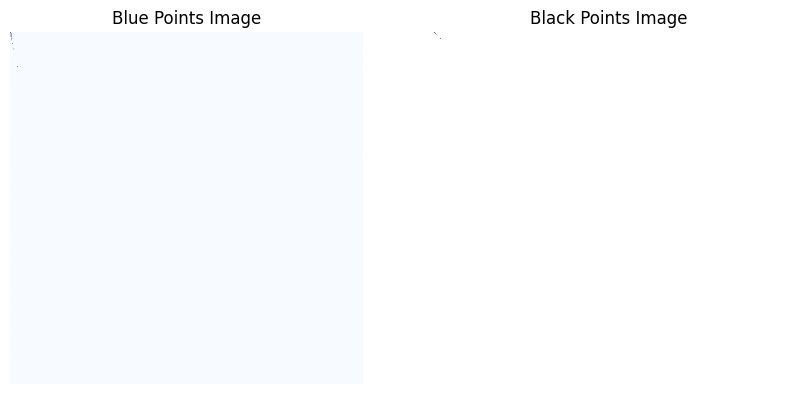

In [18]:
## #TODO Convert those projects to an image take note of the scale for simplicity you can downsample to an image of 500 by 500
## #TODO plot the image and include in your report

def convert_points_to_image(points, image_size):
    
    '''
    This function converts the projected points to an image, it takes our 2D projected points and converts them into image representation of size image size by image size
    Each point is mapped to a corresponding pixel on the image grid
    '''
    image = np.zeros((image_size, image_size))
    points = np.round(points).astype(int)
    for point in points:
        x, y = point
        if 0 <= x < image_size and 0 <= y < image_size:
            image[y, x] = 1
    return image

image_size = 500
blue_image = convert_points_to_image(blue_points_proj, image_size)
black_image = convert_points_to_image(black_points_proj, image_size)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blue_image, cmap='Blues')
plt.title('Blue Points Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(black_image, cmap='Greys')
plt.title('Black Points Image')
plt.axis('off')
plt.show()


### PART II Image Demosaicing

Bayer Image with missing pixels


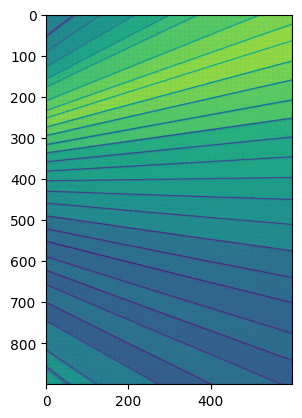

In [10]:
with open('data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
print("Bayer Image with missing pixels")
plt.imshow(loaded_data)

In [ ]:
#TODO Complete the function  below to convert bayer to rgb using bilinear interpolation
#RG
#GB
def bayer2rgb(image,height,width):
    im_color = np.zeros([height,width,3]);
    for y in range(height):
        for x in range(width):
            if y%2 == 0 and x%2 == 0:
                im_color[y,x,0] = image[y,x]
                im_color[y,x,1] = (image[y-1,x] + image[y+1,x] + image[y,x-1] + image[y,x+1])/4
                im_color[y,x,2] = (image[y+1,x+1] + image[y-1,x+1] + image[y+1,x-1] + image[y-1,x-1])/4
            elif y%2 == 0 and x%2 == 1:
                im_color[y,x,0] = (image[y,x-1] + image[y,x+1])/2
                im_color[y,x,1] = image[y,x]
                im_color[y,x,2] = (image[y-1,x] + image[y+1,x])/2
            elif y%2 == 1 and x%2 == 0:
                im_color[y,x,0] = (image[y-1,x] + image[y+1,x])/2
                im_color[y,x,1] = image[y,x]
                im_color[y,x,2] = (image[y,x-1] + image[y,x+1])/2
            else:
                im_color[y,x,0] = (image[y+1,x+1] + image[y-1,x+1] + image[y+1,x-1] + image[y-1,x-1])/4
                im_color[y,x,1] = (image[y+1,x] + image[y-1,x] + image[y,x-1] + image[y,x+1])/4
                im_color[y,x,2] = image[y,x]
    return im_color
    raise NotImplemented

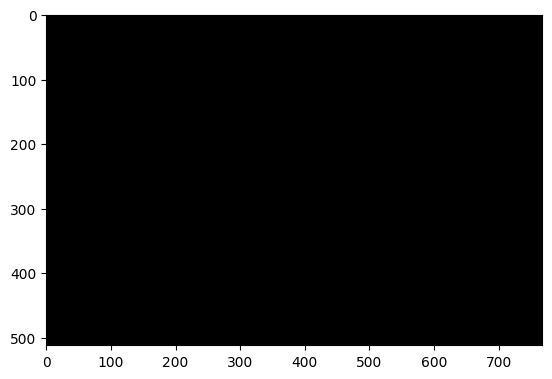

In [12]:
color_data = np.zeros([512,768,3])

# color_data = bayer2rgb(loaded_data,loaded_data.shape[0], loaded_data.shape[1])

img1 = Image.fromarray(color_data.astype(np.uint8))
plt.imshow(img1)


Here is the result for your reference in evaluating your performance
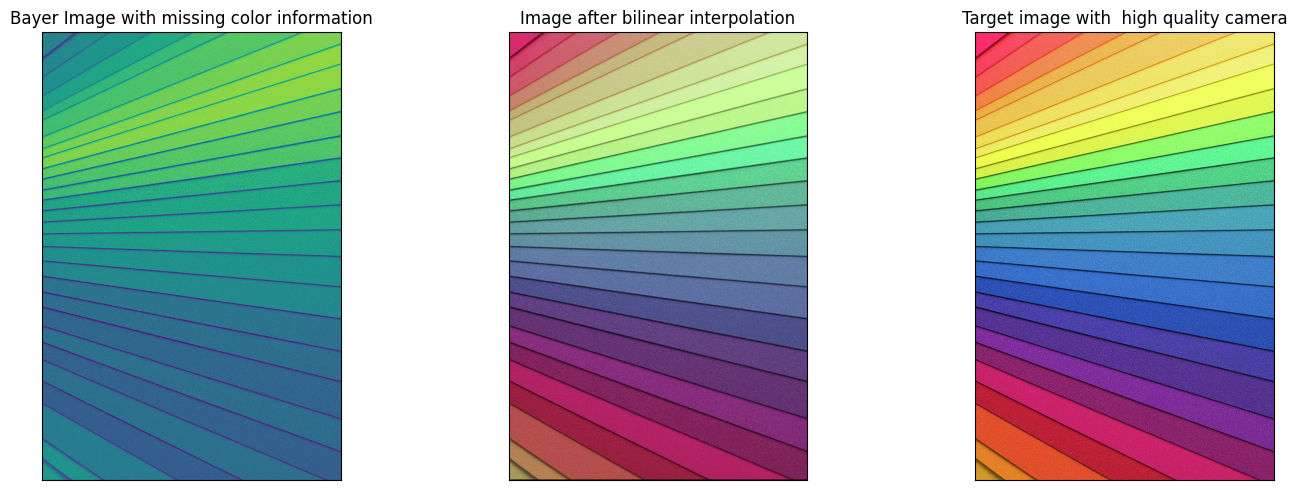